In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

from xgboost import XGBClassifier


In [38]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [39]:
cdc_diabetes_health_indicators.variables

name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             None   
15               GenHlth  Feature  Integer             None   
16              MentHlth  Feature  Integer             None   
17              PhysHlth  Feature  Integer             None   
18              DiffWalk  Feature   Binary             None   
19                   Sex  Feature   Binary              Sex   
20                   Age  Feature  Integer              Age   
21             Education  Feature  Integer  Education Level   
22                Income  Feature  Integer           Income   

                                          description units missing_values  
0                                          Patient ID  None             no  
1         0 = no diabetes 1 = prediabetes or diabetes  None             no  
2                          0 = no high BP 1 = high BP  None             no  
3        0 = no high cholesterol 1 = high cholesterol  None             no  
4   0 = no cholesterol check in 5 years 1 = yes ch...  None             no  
5                                     Body Mass Index  None             no  
6   Have you smoked at least 100 cigarettes in you...  None             no  
7        (Ever told) you had a stroke. 0 = no 1 = yes  None             no  
8   coronary heart disease (CHD) or myocardial inf...  None             no  
9   physical activity in past 30 days - not includ...  None             no  
10  Consume Fruit 1 or more times per day 0 = no 1...  None             no  
11  Consume Vegetables 1 or more times per day 0 =...  None             no  
12  Heavy drinkers (adult men having more than 14 ...  None             no  
13  Have any kind of health care coverage, includi...  None             no  
14  Was there a time in the past 12 months when yo...  None             no  
15  Would you say that in general your health is: ...  None             no  
16  Now thinking about your mental health, which i...  None             no  
17  Now thinking about your physical health, which...  None             no  
18  Do you have serious difficulty walking or clim...  None             no  
19                                0 = female 1 = male  None             no  
20  13-level age category (_AGEG5YR see codebook) ...  None             no  
21  Education level (EDUCA see codebook) scale 1-6...  None             no  
22  Income scale (INCOME2 see codebook) scale 1-8 ...  None             no

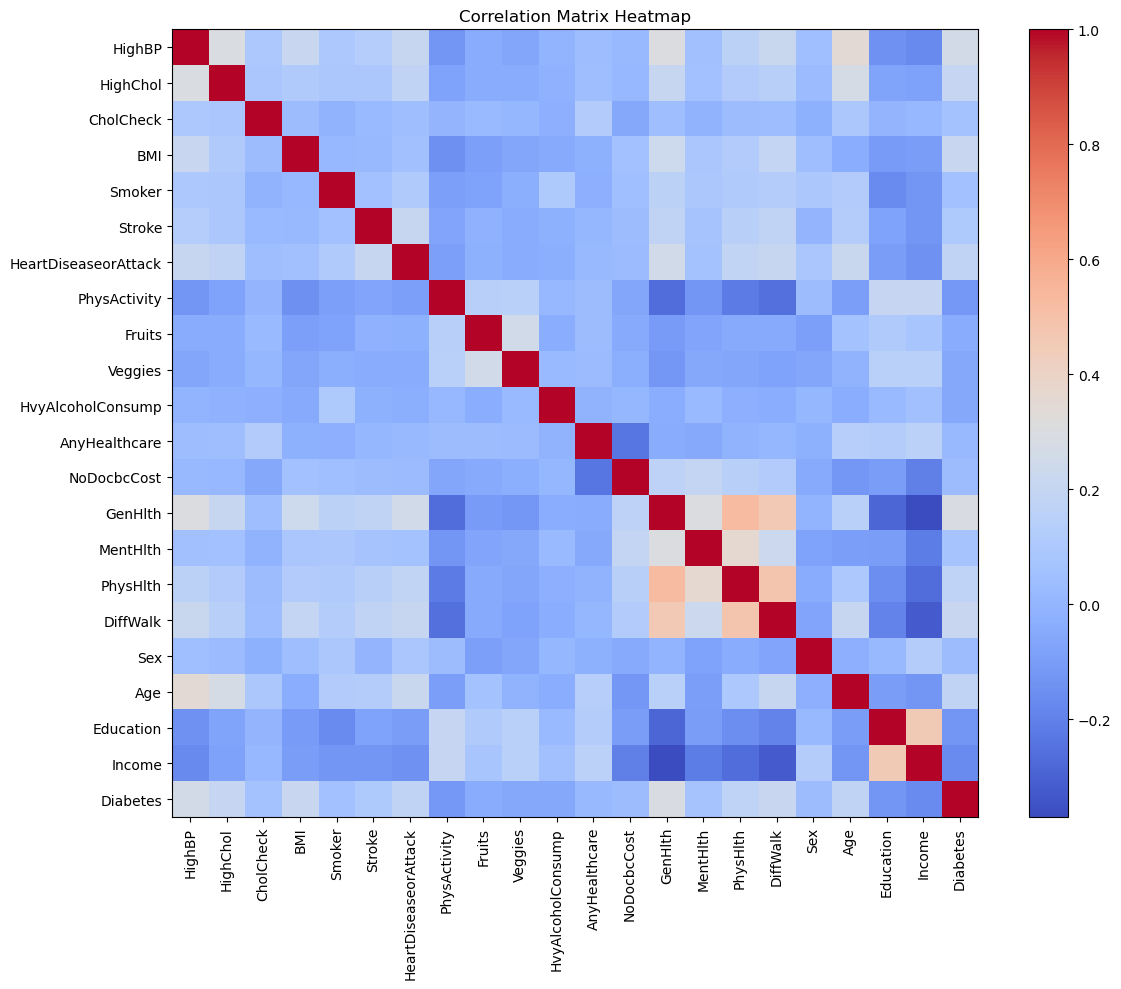

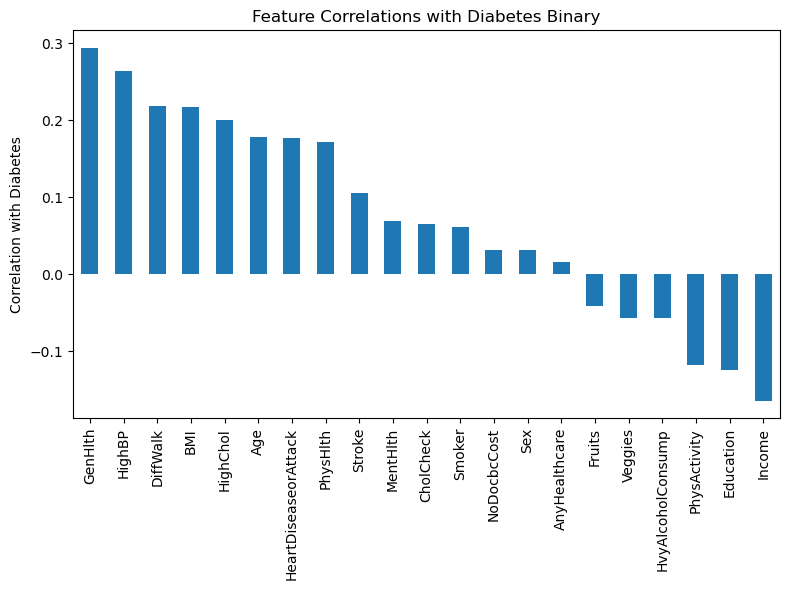

In [40]:
df = X.copy()
df['Diabetes'] = y

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

target_corr = corr_matrix['Diabetes'].drop('Diabetes').sort_values(ascending=False)

plt.figure(figsize=(8, 6))
target_corr.plot(kind='bar')
plt.ylabel('Correlation with Diabetes')
plt.title('Feature Correlations with Diabetes Binary')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

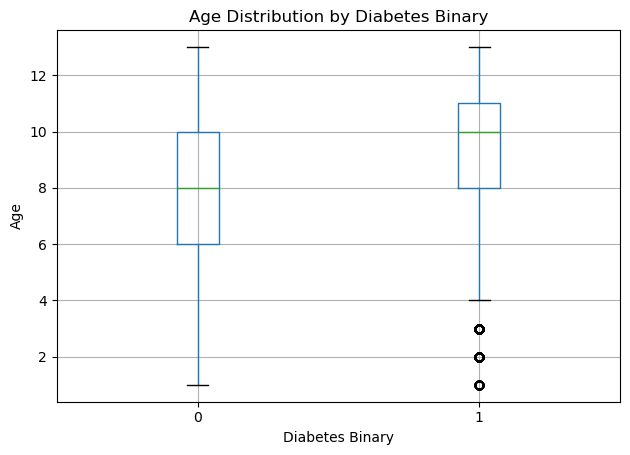

<Figure size 800x600 with 0 Axes>

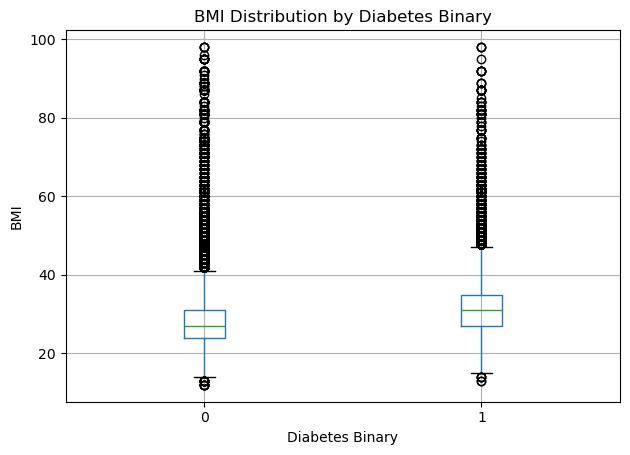

<Figure size 800x600 with 0 Axes>

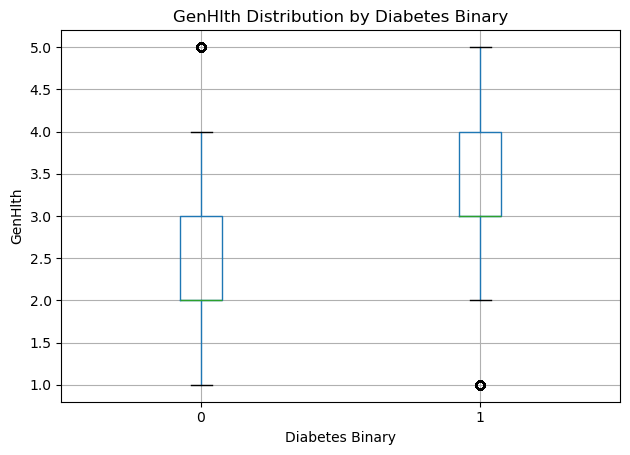

<Figure size 800x600 with 0 Axes>

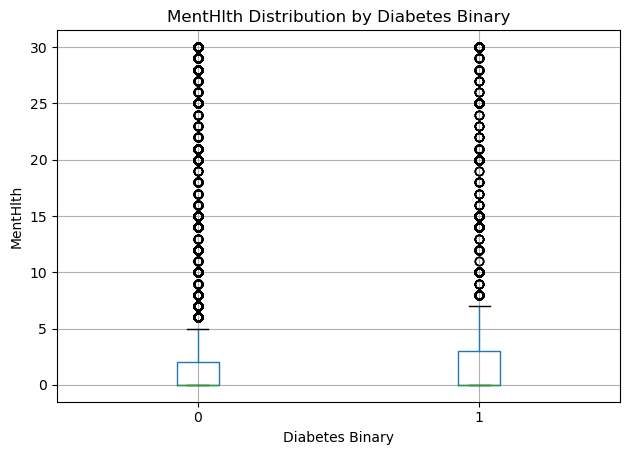

<Figure size 800x600 with 0 Axes>

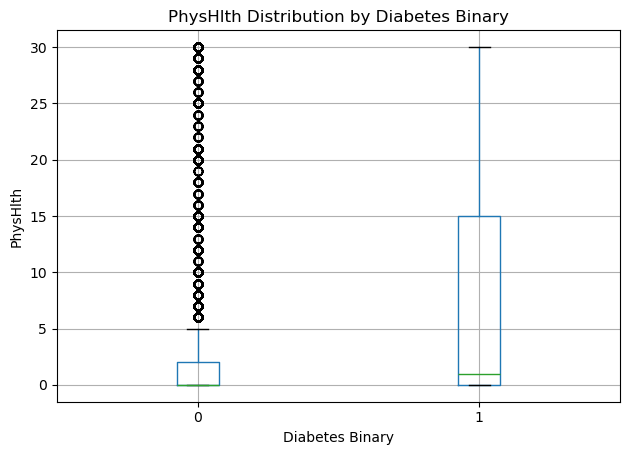

<Figure size 800x600 with 0 Axes>

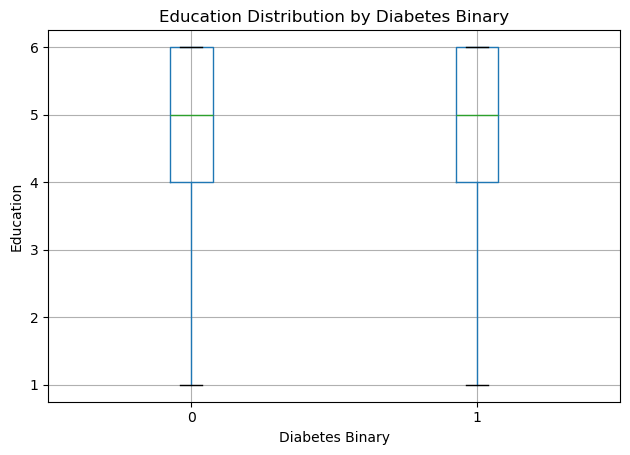

<Figure size 800x600 with 0 Axes>

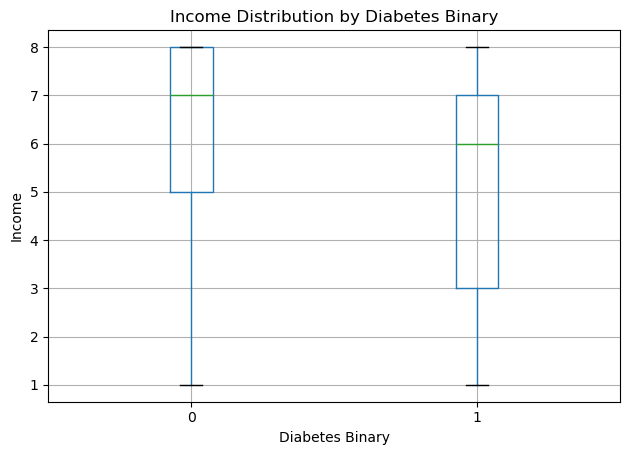

In [41]:
features_to_plot = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=feature, by='Diabetes')
    plt.title(f'{feature} Distribution by Diabetes Binary')
    plt.suptitle('')  # Removes the automatic suptitle
    plt.xlabel('Diabetes Binary')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

In [42]:
cdc_diabetes_health_indicators.variables

name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             None   
15               GenHlth  Feature  Integer             None   
16              MentHlth  Feature  Integer             None   
17              PhysHlth  Feature  Integer             None   
18              DiffWalk  Feature   Binary             None   
19                   Sex  Feature   Binary              Sex   
20                   Age  Feature  Integer              Age   
21             Education  Feature  Integer  Education Level   
22                Income  Feature  Integer           Income   

                                          description units missing_values  
0                                          Patient ID  None             no  
1         0 = no diabetes 1 = prediabetes or diabetes  None             no  
2                          0 = no high BP 1 = high BP  None             no  
3        0 = no high cholesterol 1 = high cholesterol  None             no  
4   0 = no cholesterol check in 5 years 1 = yes ch...  None             no  
5                                     Body Mass Index  None             no  
6   Have you smoked at least 100 cigarettes in you...  None             no  
7        (Ever told) you had a stroke. 0 = no 1 = yes  None             no  
8   coronary heart disease (CHD) or myocardial inf...  None             no  
9   physical activity in past 30 days - not includ...  None             no  
10  Consume Fruit 1 or more times per day 0 = no 1...  None             no  
11  Consume Vegetables 1 or more times per day 0 =...  None             no  
12  Heavy drinkers (adult men having more than 14 ...  None             no  
13  Have any kind of health care coverage, includi...  None             no  
14  Was there a time in the past 12 months when yo...  None             no  
15  Would you say that in general your health is: ...  None             no  
16  Now thinking about your mental health, which i...  None             no  
17  Now thinking about your physical health, which...  None             no  
18  Do you have serious difficulty walking or clim...  None             no  
19                                0 = female 1 = male  None             no  
20  13-level age category (_AGEG5YR see codebook) ...  None             no  
21  Education level (EDUCA see codebook) scale 1-6...  None             no  
22  Income scale (INCOME2 see codebook) scale 1-8 ...  None             no

Identified binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


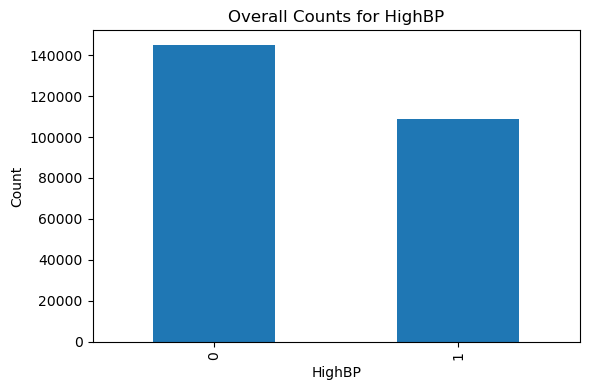

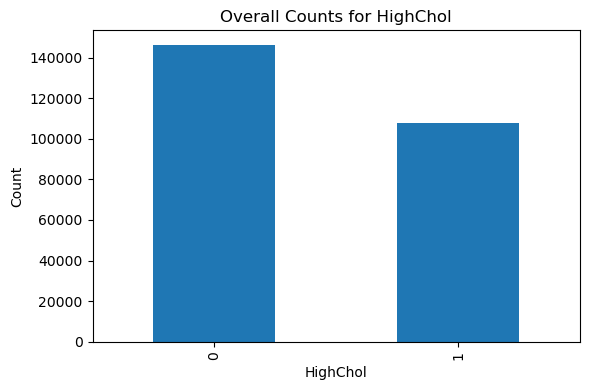

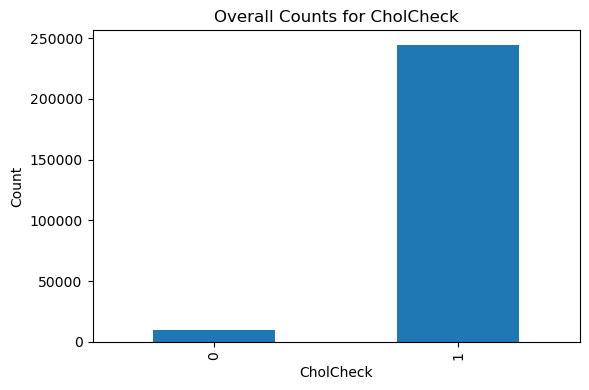

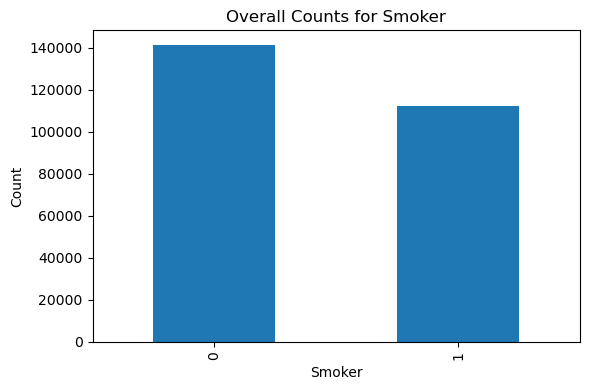

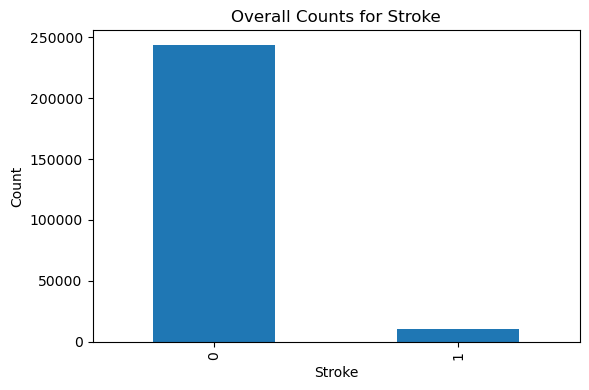

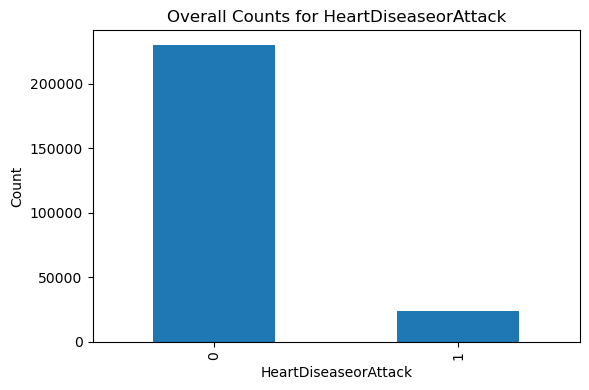

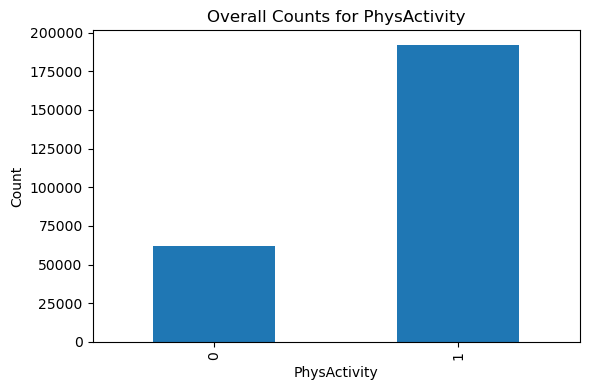

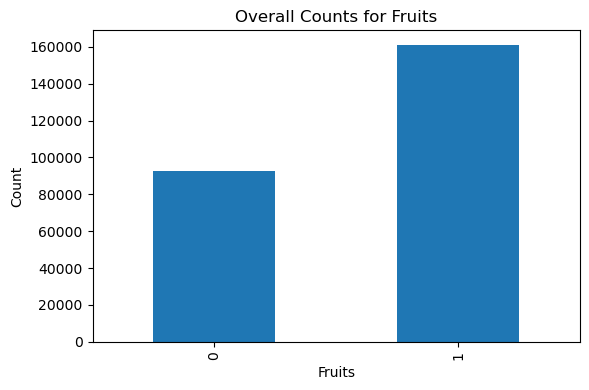

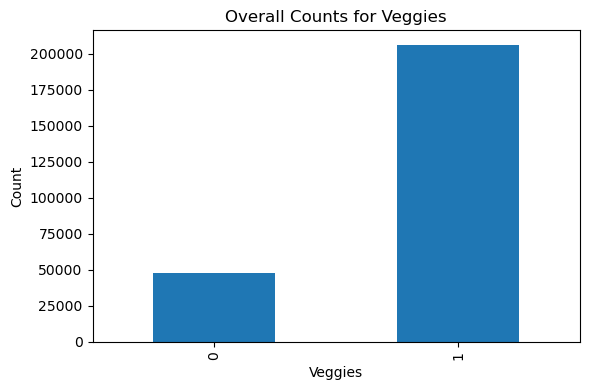

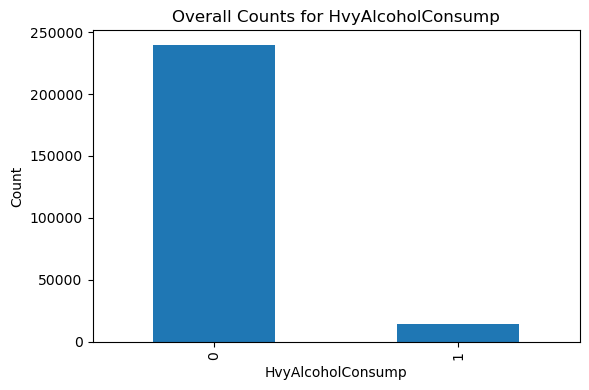

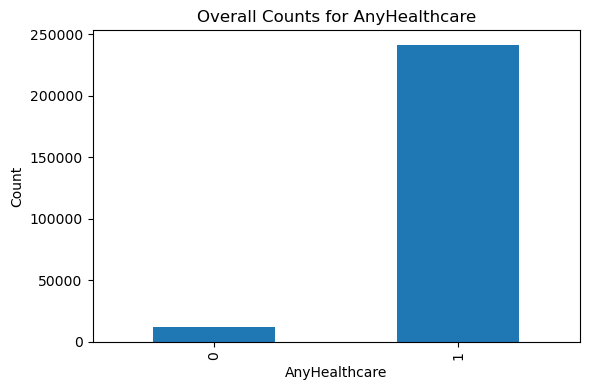

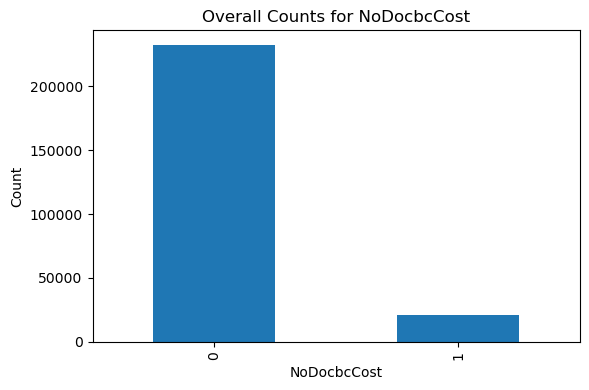

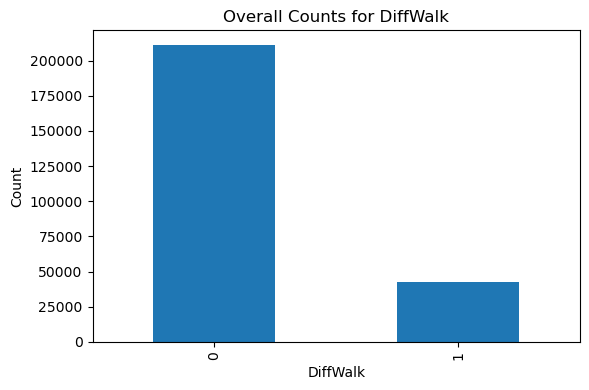

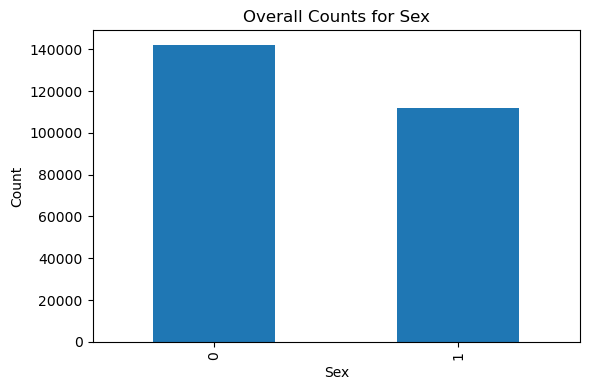

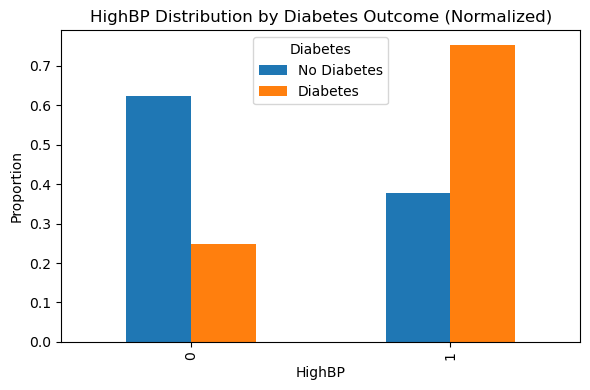

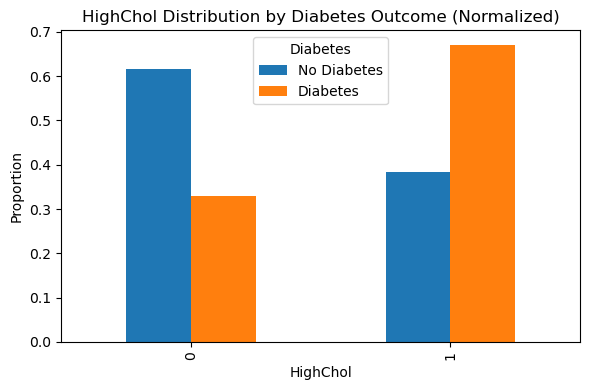

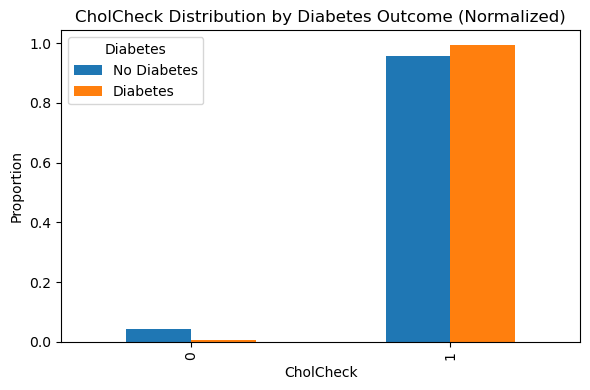

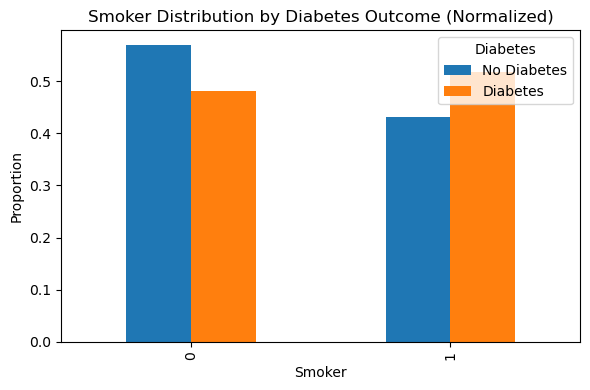

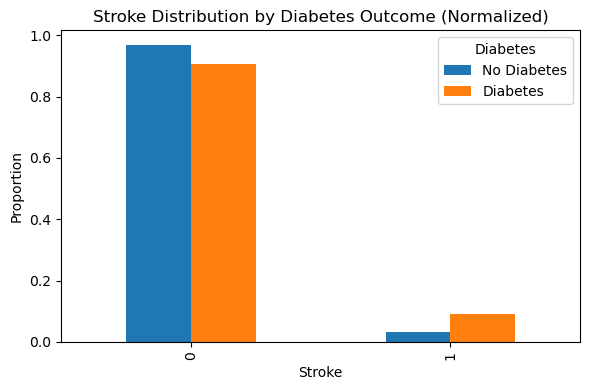

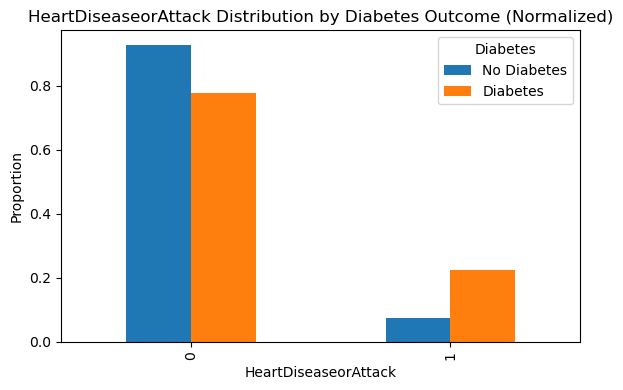

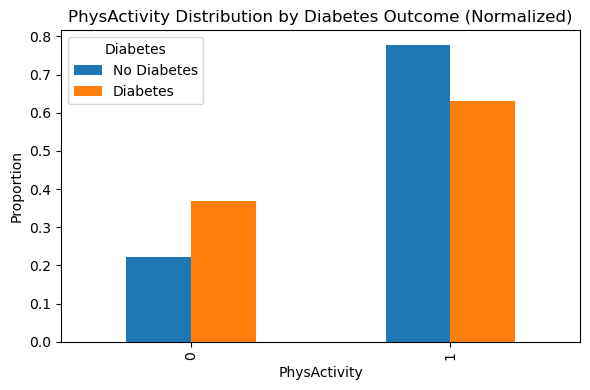

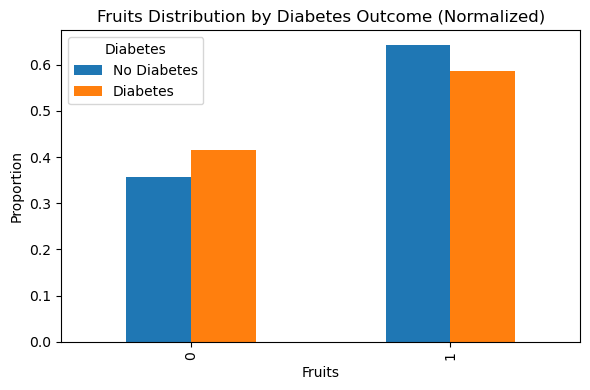

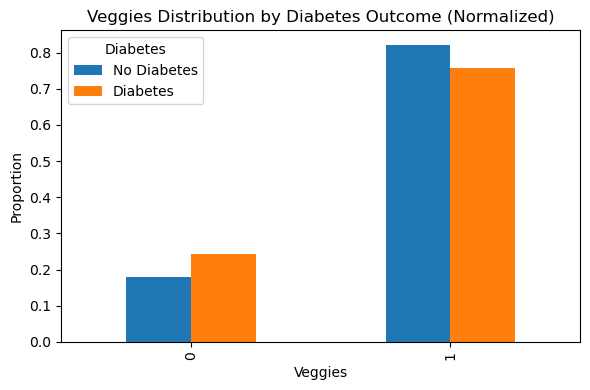

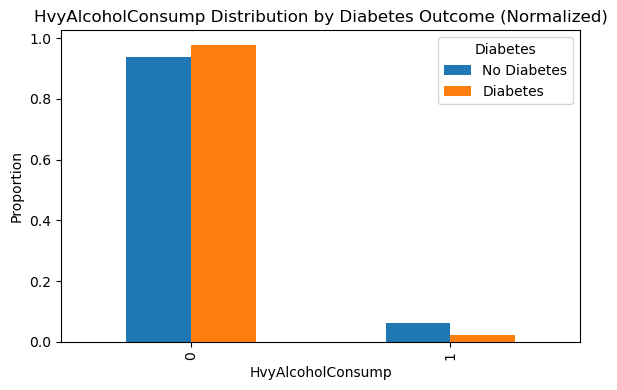

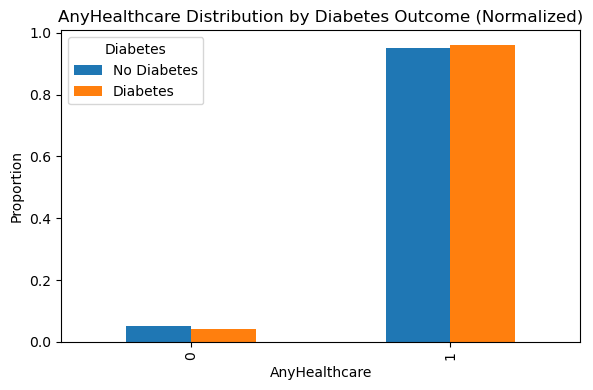

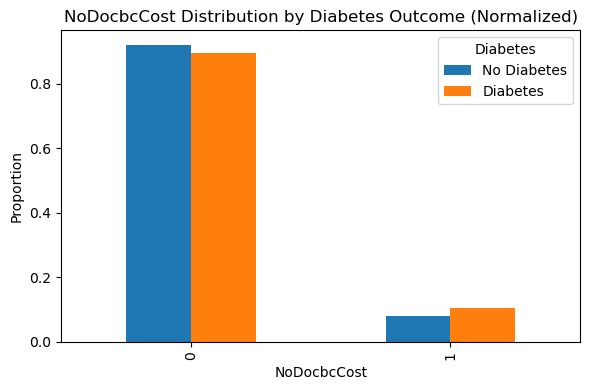

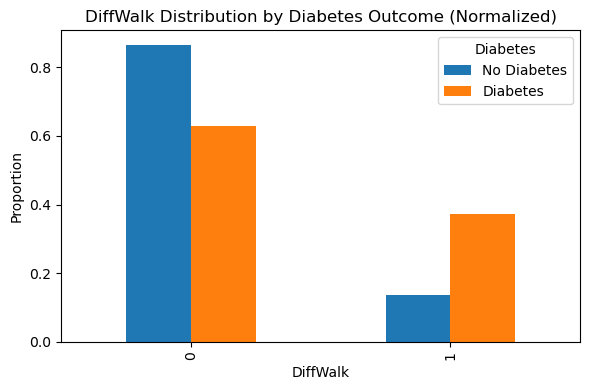

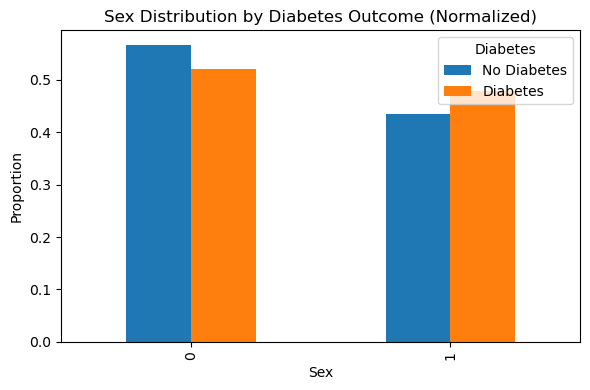

In [43]:
binary_cols = []
for col in df.columns:
    if col != 'Diabetes':
        unique_vals = df[col].dropna().unique()
        if set(unique_vals).issubset({0, 1}):
            binary_cols.append(col)

print("Identified binary columns:", binary_cols)

for col in binary_cols:
    plt.figure(figsize=(6, 4))
    counts = df[col].value_counts().sort_index() 
    counts.plot(kind='bar')
    plt.title(f'Overall Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

for col in binary_cols:
    plt.figure(figsize=(6, 4))
    crosstab_norm = pd.crosstab(df[col], df['Diabetes'], normalize='columns')
    crosstab_norm.plot(kind='bar', ax=plt.gca())
    plt.title(f'{col} Distribution by Diabetes Outcome (Normalized)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.tight_layout()
    plt.show()

In [44]:
X_new = X.copy()

risk_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
X_new['CardioRiskScore'] = X_new[risk_cols].sum(axis=1)

X_new['WellnessScore'] = X_new['GenHlth'] - ((X_new['MentHlth'] + X_new['PhysHlth']) / 30)

X_new['SES'] = X_new['Education'] + X_new['Income']

X_new['LifestyleScore'] = X_new[['PhysActivity', 'Fruits', 'Veggies']].sum(axis=1) - X_new[['Smoker', 'HvyAlcoholConsump']].sum(axis=1)

X_new['Age_BMI_Interaction'] = X_new['Age'] * X_new['BMI']

X_new['MentalToPhysicalRatio'] = X_new.apply(lambda row: row['MentHlth'] / row['PhysHlth'] if row['PhysHlth'] != 0 else 0, axis=1)

X_new['HealthcareAccess'] = X_new['AnyHealthcare'] - X_new['NoDocbcCost']

In [45]:
X_new.dtypes

HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                    int64
MentHlth                   int64
PhysHlth                   int64
DiffWalk                   int64
Sex                        int64
Age                        int64
Education                  int64
Income                     int64
CardioRiskScore            int64
WellnessScore            float64
SES                        int64
LifestyleScore             int64
Age_BMI_Interaction        int64
MentalToPhysicalRatio    float64
HealthcareAccess           int64
dtype: object

In [59]:
def cluster_training_data(features, outcome, cluster_list, outcome_col='Diabetes', test_size=0.2, random_state=42):
    """
    Splits the full dataset into training and testing sets.
    Uses only the training set to compute clustering centroids.
    
    For each n_clusters in cluster_list:
      - Builds a pipeline with a preprocessor (scaling numerical and one-hot encoding categorical features)
        and KMeans clustering on the training data.
      - Attaches the resulting cluster labels to a new training dataframe.
      - Saves the clustering pipeline and centroids.
      - Plots a PCA visualization for the training set.
      
    Parameters:
      features     : DataFrame containing only the features (e.g., X_new).
      outcome      : Series containing the outcome labels (e.g., y).
      cluster_list : List of integers specifying the number of clusters to try (e.g., [2,3,4,5,6,7,8]).
      outcome_col  : Name of the outcome column to add (default 'Diabetes').
      test_size    : Fraction of data to hold out as testing (default 0.2).
      random_state : Random state for reproducibility.
      
    Returns:
      A dictionary with two keys:
        'clusters'  : A dictionary mapping each n_clusters value to a dict with:
                          - 'train_df': Training data with cluster labels.
                          - 'pipeline': The clustering pipeline (trained on training data).
                          - 'centroids': The KMeans centroids.
        'test_data' : The held-out testing DataFrame (with outcome, but without cluster labels).
    """
    # Merge features and outcome into one DataFrame.
    data = features.copy()
    data[outcome_col] = outcome
    
    # Split the data first: training data will be used for clustering (centroids) only.
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)
    
    # For clustering, use only training data.
    X_train = train_data.drop(columns=[outcome_col])
    
    # Identify numerical and categorical features.
    num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = X_train.select_dtypes(include=['object']).columns.tolist()  # in case there are any categorical features
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
        ]
    )
    
    cluster_results = {}
    
    for n in cluster_list:
        # Build a pipeline with preprocessing and KMeans clustering on training data.
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('kmeans', KMeans(n_clusters=n, random_state=42))
        ])
        
        pipeline.fit(X_train)
        cluster_labels = pipeline.predict(X_train)
        
        # Create a new training DataFrame with cluster labels.
        train_df_with_clusters = train_data.copy()
        train_df_with_clusters['cluster'] = cluster_labels
        
        # Get centroids from KMeans.
        centroids = pipeline.named_steps['kmeans'].cluster_centers_
        
        # Save results.
        cluster_results[n] = {
            'train_df': train_df_with_clusters,
            'pipeline': pipeline,
            'centroids': centroids
        }
        
        # PCA visualization of training set clusters.
        X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
        if hasattr(X_transformed, "toarray"):
            X_transformed = X_transformed.toarray()
            
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_transformed)
        
        plt.figure(figsize=(10, 7))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'PCA Visualization of Training Clusters for n_clusters = {n}')
        plt.legend(*scatter.legend_elements(), title="Clusters")
        plt.tight_layout()
        plt.show()
        
    return {'clusters': cluster_results, 'test_data': test_data}


### 2, 3, 4, and 5 show the most promies in terms of being useful labels. 6, 7, and 8 clusters have to much overlap and probably wont be useful. 

# SVM with all original features

In [60]:
y_one = y.iloc[:,:1].to_numpy().T[0]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_one, test_size=0.2, random_state=42)

# SVM with L2 penalty
pipeline_l2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l2', dual=True, random_state=42, max_iter=10000, class_weight='balanced'))
])
pipeline_l2.fit(X_train, y_train)
pred_l2 = pipeline_l2.predict(X_test)
print("Classification Report for SVM with L2 Penalty:")
print(classification_report(y_test, pred_l2))

# SVM with L1 penalty
# Note: For L1 penalty, LinearSVC requires dual=False.
pipeline_l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l1', dual=False, random_state=42, max_iter=10000, class_weight='balanced'))
])
pipeline_l1.fit(X_train, y_train)
pred_l1 = pipeline_l1.predict(X_test)
print("Classification Report for SVM with L1 Penalty:")
print(classification_report(y_test, pred_l1))

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report for SVM with L2 Penalty:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43739
           1       0.59      0.08      0.15      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.54      0.54     50736
weighted avg       0.83      0.87      0.82     50736

Classification Report for SVM with L1 Penalty:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43739
           1       0.59      0.08      0.15      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.54      0.54     50736
weighted avg       0.83      0.87      0.82     50736



# SVM with cluster labels as feature

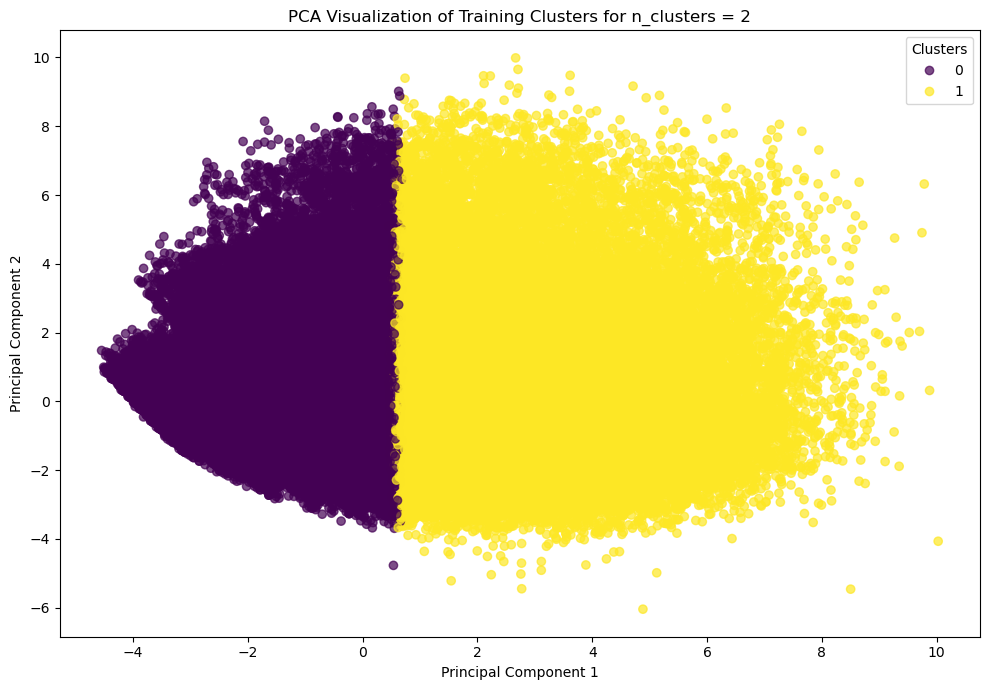

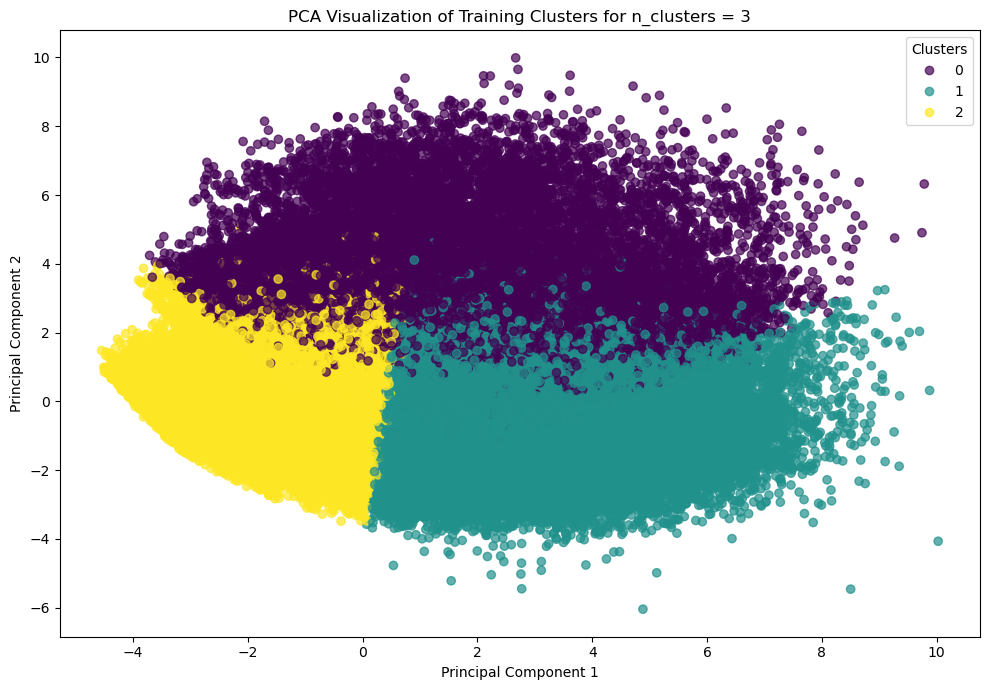

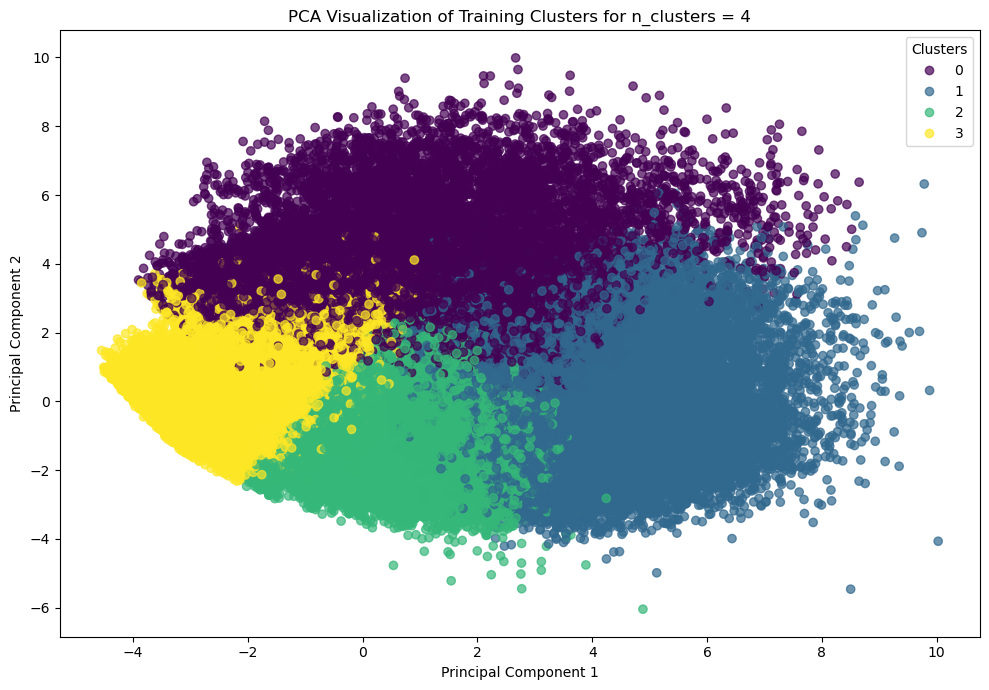

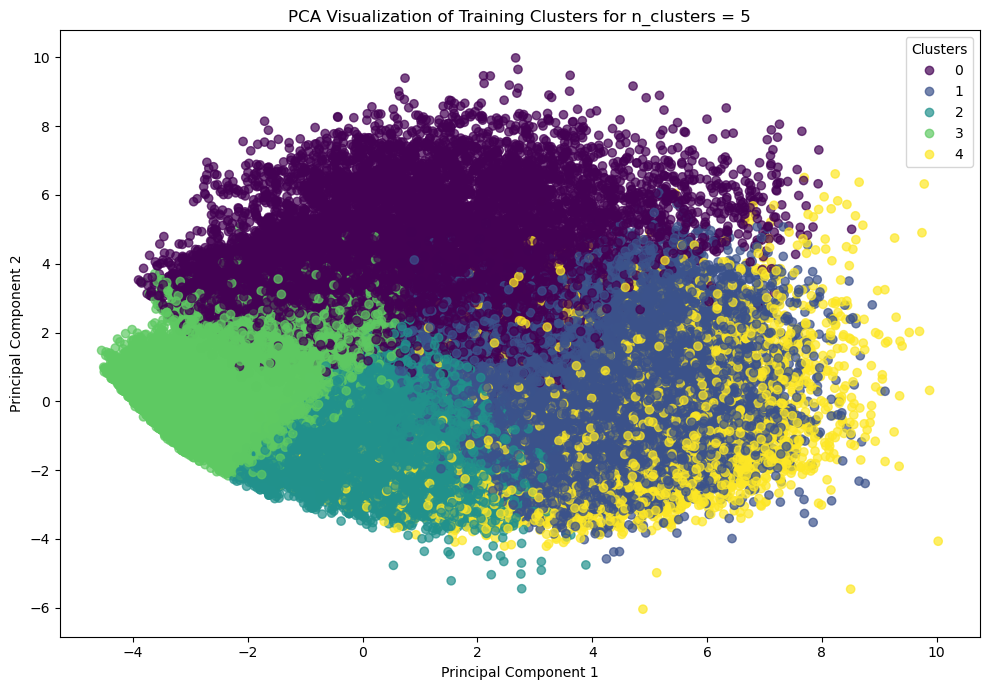

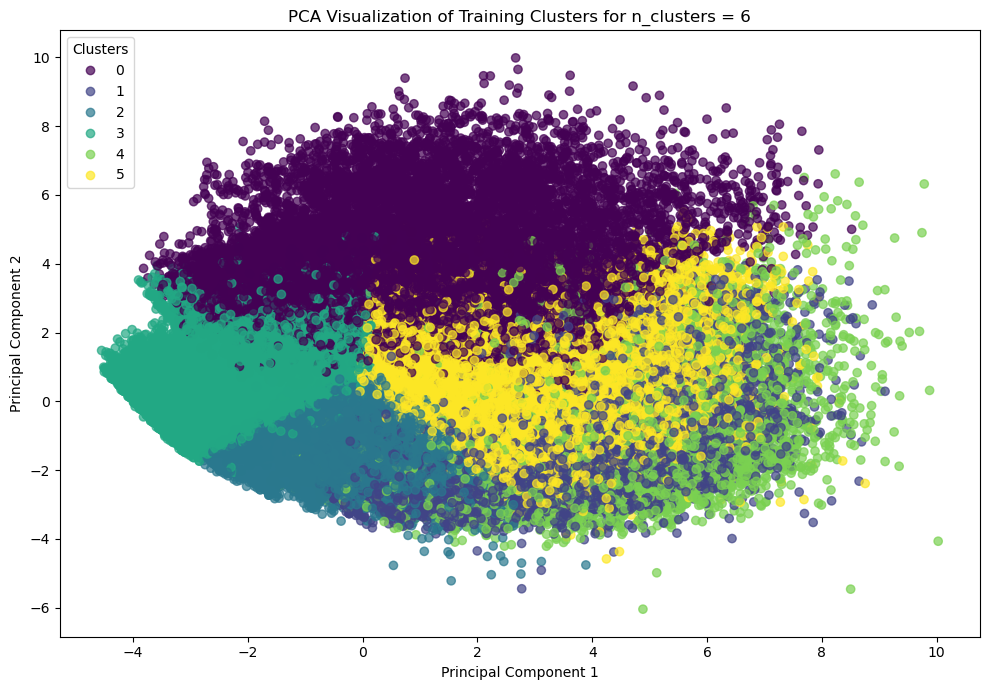

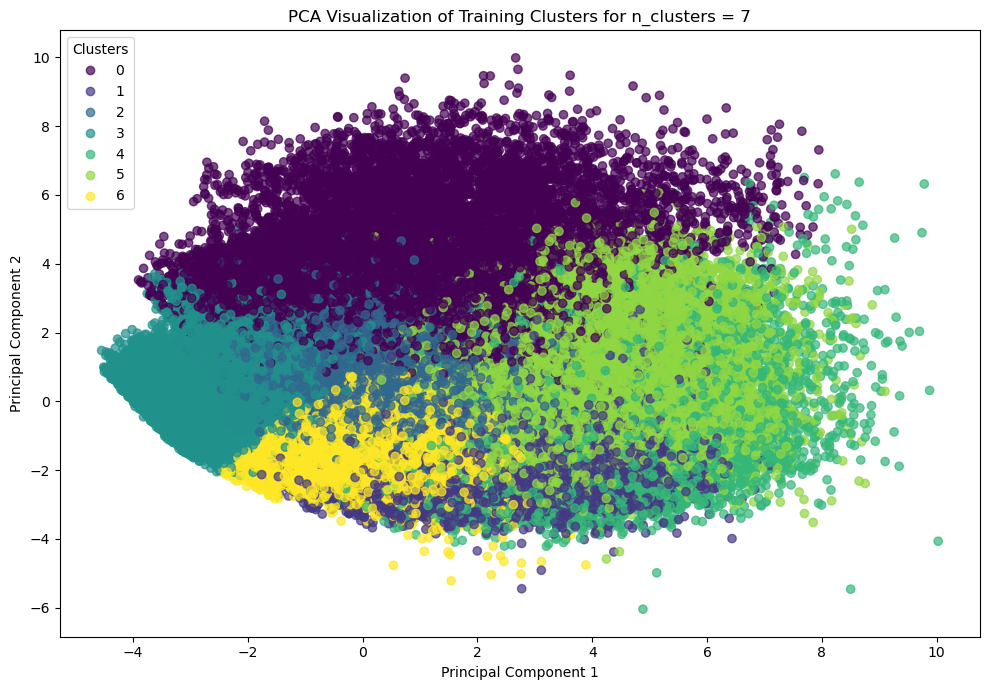

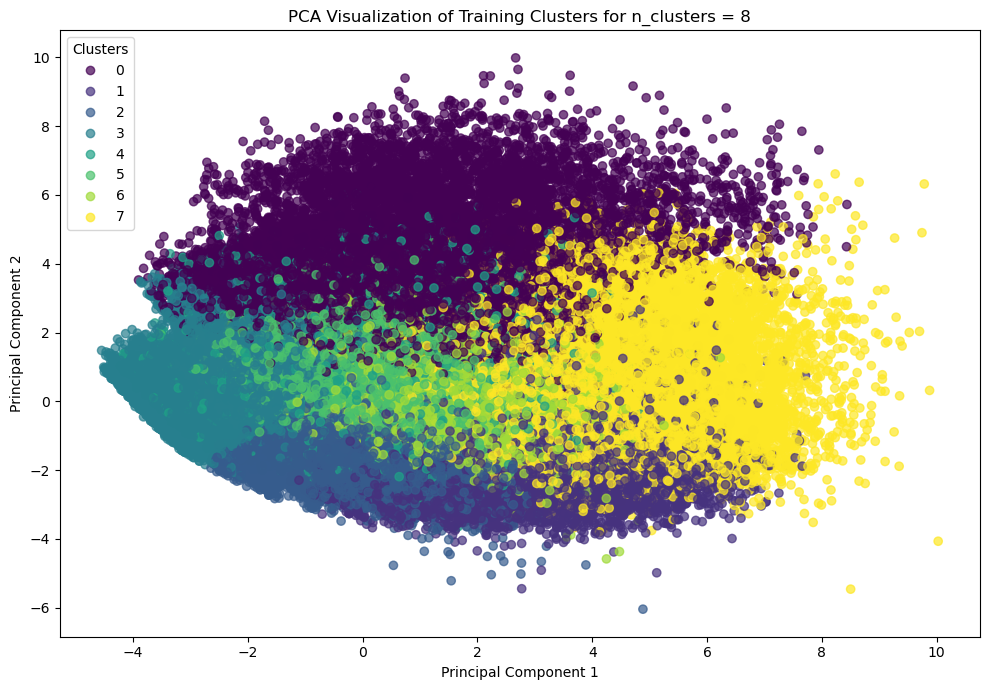

In [62]:
# --- Example Usage for Clustering ---
# Assume X_new (features) and y (outcome labels) are defined.
cluster_dict = cluster_training_data(X_new, y, cluster_list=[2, 3, 4, 5, 6, 7, 8], outcome_col='Diabetes')
# For example, choose the result for 3 clusters:
cluster3_result = cluster_dict['clusters'][3]
cluster3_train_df = cluster3_result['train_df']      # Training data with cluster labels.
cluster3_pipeline = cluster3_result['pipeline']      # Clustering pipeline trained on training data.
cluster3_centroids = cluster3_result['centroids']      # Centroids computed on training data.
# The held-out testing data (without cluster labels) is stored as:
clustering_test_df = cluster_dict['test_data']

In [63]:
X_train_class = cluster3_train_df.drop(columns=['Diabetes'])
y_train_class = cluster3_train_df['Diabetes']

# For testing, start with the held-out test set.
# (The test set still has the true outcome column, but no cluster label.)
X_test_unlabeled = clustering_test_df.drop(columns=['Diabetes'])

# Use the saved cluster3_pipeline to assign a cluster label to the test data.
predicted_test_clusters = cluster3_pipeline.predict(X_test_unlabeled)
X_test_class = X_test_unlabeled.copy()
X_test_class['cluster'] = predicted_test_clusters

y_test_class = clustering_test_df['Diabetes']

# --- Train SVM Classifiers ---

# SVM with L2 penalty
pipeline_l2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l2', dual=True, random_state=42, class_weight='balanced', max_iter=20000))
])
pipeline_l2.fit(X_train_class, y_train_class)
pred_l2 = pipeline_l2.predict(X_test_class)
print("Classification Report for SVM with L2 Penalty:")
print(classification_report(y_test_class, pred_l2))

# SVM with L1 penalty (requires dual=False)
pipeline_l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l1', dual=False, random_state=42, class_weight='balanced', max_iter=10000))
])
pipeline_l1.fit(X_train_class, y_train_class)
pred_l1 = pipeline_l1.predict(X_test_class)
print("Classification Report for SVM with L1 Penalty:")
print(classification_report(y_test_class, pred_l1))

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report for SVM with L2 Penalty:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     43672
           1       0.31      0.78      0.44      7064

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736

Classification Report for SVM with L1 Penalty:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     43672
           1       0.31      0.78      0.44      7064

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736



# XGB Boost classifier

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_one, test_size=0.2, random_state=42)

# Set up the XGBoost classifier.
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define a grid of hyperparameters to search.
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Use GridSearchCV to search for the best parameters.
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters.
print("Best parameters found:")
print(grid_search.best_params_)

# Use the best estimator to predict and print a classification report.
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred))

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'CardioRiskScore', 'WellnessScore', 'SES', 'LifestyleScore',
       'Age_BMI_Interaction', 'MentalToPhysicalRatio', 'HealthcareAccess'],
      dtype='object')